Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data and visualize them

In [2]:
stock_df = pd.read_csv(r"C:\Learning\PhD\Nelinearni_filtrace\CEZ.csv")
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213
...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923


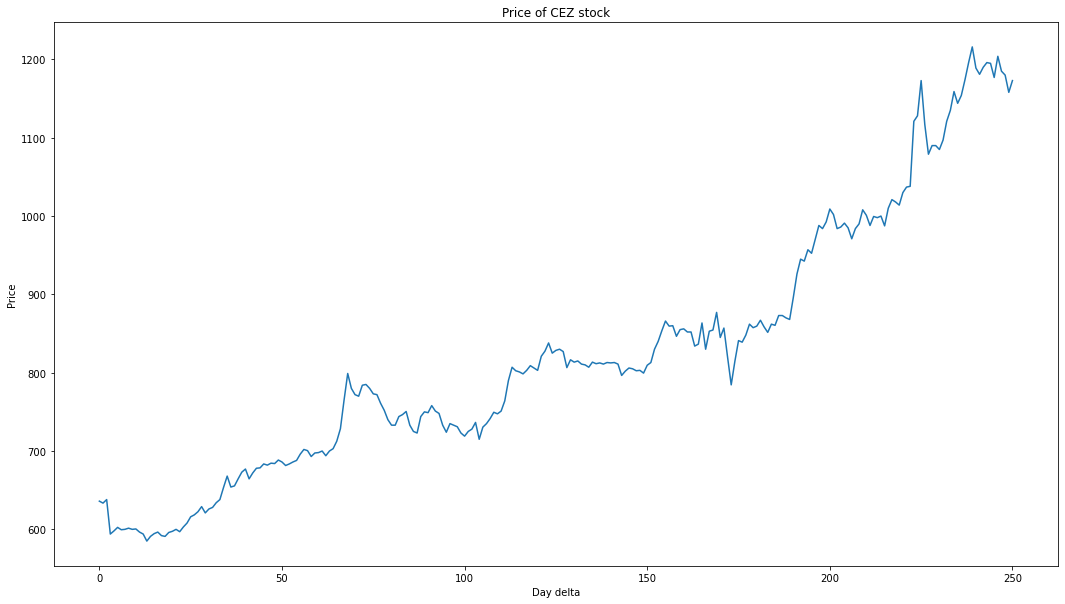

In [3]:
plt.figure(figsize=(18,10))
plt.plot(stock_df["Close"])
plt.title("Price of CEZ stock")
plt.ylabel("Price")
plt.xlabel("Day delta")
plt.show()

For the data we would like to estimate growth, which means corelation in time to price. For that purpose we asume formula.
<img src="Images/lin_form.png"  width = 200 height=100 />
We assume noise estimation equals to 0.
<img src="Images/noise_estimation.png" width = 200 height=100 />
Our equation can be written as:
<img src="Images/LSE_formula.png" width = 200 height=100 />
From this we can state our error that is equal to measurement minus our estimation.
<img src="Images/LSE_error.png" width = 200 height=100 />
We sum errors and power them to 2 in order to get positive results and increase loss of most distant estimate, so we get our cost function.
<img src="Images/LSE_error_sum.png" width = 400 height=200 />
Now we only put previous into cost function equation.
<img src="Images/LSE_cost_function_before_derivation.png" width = 400 height=200 />
And because we want to minimize it we use derivation equal to zero.
<img src="Images/LSE_cost_function_derivation.png" width = 400 height=200 />
And after reformulation we got our final formula for parameter estimation.
<img src="Images/LSE_final_formula.png" width = 400 height=200 />

In our case for H measumerement we will use delta of time, which is for us 1 day or we can use as increase of 1 per record and we would like to be predicting close price.

In [6]:
stock_df = stock_df.reset_index()
stock_df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277
1,1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918
2,2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018
3,3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889
4,4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213
...,...,...,...,...,...,...,...,...
246,246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218
247,247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357
248,248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733
249,249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923


In [7]:
# Define variables
H = np.ones((stock_df.shape[0],2))
H[:,1] = stock_df["index"]
y = np.array(stock_df["Close"])

In [107]:
# Calculate parameters
params = np.matmul(np.matmul(np.linalg.inv(np.matmul(H.T, H)), H.T), y)
params

array([558.51531967,   2.11696111])

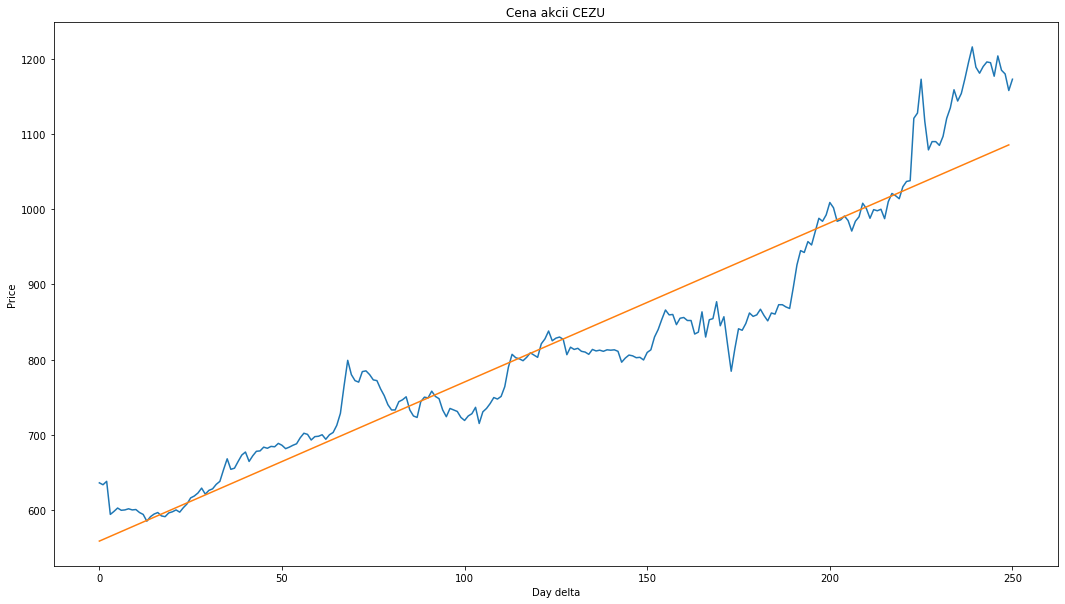

In [108]:
plt.figure(figsize=(18,10))
plt.plot(stock_df["Close"], label = "Real price")
x_est = np.arange(0,250)
plt.plot(x_est, x_est*params[1]+params[0], label = "Estimated price")
plt.title("Cena akcii CEZU")
plt.ylabel("Price")
plt.xlabel("Day delta")
plt.show()

Handwriten
<img src="Images/LSE_odvozeni.jpg" width = 600 height=400 />